In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# import datasets
df = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [3]:
# new dataframe
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']
df_reg = df[['TotalSF','YearRemodAdd','GarageArea','FullBath']]
df_reg = add_constant(df_reg)
df_reg.head(5)

,const,TotalSF,YearRemodAdd,GarageArea,FullBath
0,1.0,2566,2003,548,2
1,1.0,2524,1976,460,2
2,1.0,2706,2002,608,2
3,1.0,2473,1970,642,1
4,1.0,3343,2000,836,2


In [4]:
# check multicollinearity
for index,col in enumerate(df_reg.columns):
    if col == 'const': continue
    print(f'{col}: {variance_inflation_factor(df_reg.values, index)}')

TotalSF: 1.8412057624783007
YearRemodAdd: 1.3119815681283826
GarageArea: 1.5420442578519384
FullBath: 1.6648989865616222


In [5]:
df['LogSalePrice'] = np.log(df['SalePrice'])
y = np.array(df['LogSalePrice']).reshape(-1, 1)

reg = LinearRegression()
poly = PolynomialFeatures(4)

In [6]:
df_reg = df[['TotalSF','YearRemodAdd','GarageArea','FullBath']].fillna(0)
df_reg = add_constant(df_reg)

for index,col in enumerate(df_reg.columns):
    if col == 'const': continue
    print(f'{col}: {variance_inflation_factor(df_reg.values, index)}')

TotalSF: 1.8412057624783007
YearRemodAdd: 1.3119815681283826
GarageArea: 1.5420442578519384
FullBath: 1.6648989865616222


In [7]:
#df_reg.drop(['const'],axis=1)
y = df['SalePrice']
x_ = poly.fit_transform(df_reg)

reg.fit(x_, y)
print("r^2: %.3f" % r2_score(reg.predict(x_),y))

r^2: 0.821


Text(0, 0.5, 'Actual ($)')

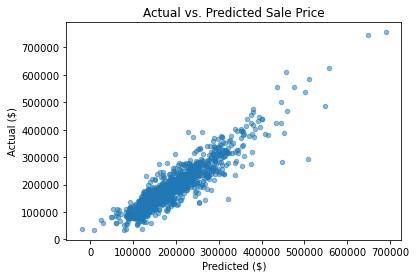

In [8]:
plt.scatter(reg.predict(x_),y,alpha=0.5,s=20)
plt.title('Actual vs. Predicted Sale Price')
plt.xlabel('Predicted ($)')
plt.ylabel('Actual ($)')

In [9]:
test['TotalSF'] = test['GrLivArea'] + test['TotalBsmtSF']
#x = test[['TotalSF','GarageArea']]

#x_ = poly.fit_transform(x.fillna(0))

test_vars = test[['TotalSF','YearRemodAdd','GarageArea','FullBath']].fillna(0)
test_vars = add_constant(test_vars)
test_vars = poly.fit_transform(test_vars)
pred = reg.predict(test_vars)
#pred = np.exp(pred)
pred = pred.tolist()
#pred = [x[0] for x in pred]
submission = pd.DataFrame({'ID': test['Id'],'SalePrice': pred})
submission

,ID,SalePrice
0,1461,131660.707395
1,1462,145319.681445
2,1463,185059.110222
3,1464,182570.248318
4,1465,179937.036785
...,...,...
1454,2915,94958.518118
1455,2916,120260.793396
1456,2917,167689.300230
1457,2918,96869.328365


In [10]:
submission.to_csv('submission.csv', index=False)

In [11]:
df_reg = df[['TotalSF','YearRemodAdd','GarageArea','FullBath']].fillna(0)

x_train, x_test, y_train, y_test = train_test_split(df_reg, y, test_size = 0.3, random_state = 0)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

reg.fit(x_train, y_train)
#print("r^2: %.3f" % r2_score(reg.predict(x_test),y_test))
x_train.shape[1]
reg.coef_

array([ 7.63398184e-03,  2.28960476e+02, -6.58997961e+01, -3.19107782e+00,
       -1.73686961e+01,  6.03163849e+01, -6.00845718e+01, -1.56877469e+02,
       -7.20733811e+03,  7.09063882e+02,  1.35904488e+02, -5.72838692e+03,
        6.78424365e+01, -1.26348361e+03, -1.23488462e+01,  1.35828333e-04,
       -6.27233247e-02,  1.69437382e-03,  9.71277468e-01,  6.42958369e-02,
        1.56480401e-01,  3.36715504e+00, -7.78586154e-03,  2.05180587e+00,
        6.18817462e+02, -4.83258904e-01, -1.37075976e-01,  1.31302267e+01,
       -6.70697681e-02,  1.29654890e+00, -3.43661920e+03,  1.17701058e-02,
       -8.57302858e-01, -1.82787903e+03, -1.02689598e+00, -7.72638487e-09,
       -5.05938544e-08,  2.54050292e-08,  2.17891374e-05,  1.62932167e-05,
       -9.38697212e-07, -5.56838656e-04, -5.75693662e-08,  9.01175986e-06,
       -8.29032930e-03, -1.72039129e-05, -3.88984861e-05,  2.24898814e-04,
        3.93153096e-06, -1.05089711e-03, -3.09891139e-01,  2.17824891e-07,
        2.94191702e-05, -

In [12]:
# see p values for all 70 or so "new" variables and take top 4-5 to solve for overfitting

import statsmodels.api as sm
x = poly.fit_transform(df_reg)
x = sm.add_constant(x)
reg.fit(x,y)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     150.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:46:10   Log-Likelihood:                -17160.
No. Observations:                1460   AIC:                         3.443e+04
Df Residuals:                    1406   BIC:                         3.471e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0449      0.036      1.236      0.2

In [13]:
print(x.shape)
x_new = x[:,[15,33,34,36,44]]
x_new

(1460, 70)


array([[1.68954575e+10, 2.19200000e+03, 8.00000000e+00, 3.38416014e+13,
        2.63374240e+07],
       [1.60793338e+10, 1.84000000e+03, 8.00000000e+00, 3.17727636e+13,
        2.54823040e+07],
       [1.98145118e+10, 2.43200000e+03, 8.00000000e+00, 3.96686527e+13,
        2.92897440e+07],
       ...,
       [4.25816715e+10, 1.00800000e+03, 8.00000000e+00, 8.54188330e+13,
        4.87762560e+07],
       [1.00218124e+10, 2.40000000e+02, 1.00000000e+00, 2.00035376e+13,
        4.64833600e+06],
       [1.58510817e+10, 2.76000000e+02, 1.00000000e+00, 3.11473756e+13,
        6.31014400e+06]])

In [14]:
reg.fit(x_new,y)
print("r^2: %.3f" % r2_score(reg.predict(x_new),y))

r^2: 0.271


In [15]:
#x_new = x[:,[18,25,26,42,52,53,55,56,62,63,68]]
x_new = x[:,[14,15,27,30,33,34,36,44,57,60,65]]
x_new = sm.add_constant(x_new)
y = df['SalePrice']
reg.fit(x_new,y)
print("r^2: %.3f" % r2_score(reg.predict(x_new),y))

r^2: 0.508


In [16]:
#test_vars = poly.fit_transform(test_vars)
#test_vars = sm.add_constant(test_vars)
test_vars_new = test_vars[:,[14,15,27,30,33,34,36,44,57,60,65]]
test_vars_new = sm.add_constant(test_vars_new)
pred = reg.predict(test_vars_new)
pred = pred.tolist()
submission = pd.DataFrame({'ID': test['Id'],'SalePrice': pred})
submission

,ID,SalePrice
0,1461,-3.853613e+08
1,1462,-3.880141e+08
2,1463,-4.146161e+08
3,1464,-4.143741e+08
4,1465,-4.126380e+08
...,...,...
1454,2915,-3.874869e+08
1455,2916,-3.916240e+08
1456,2917,-4.020764e+08
1457,2918,-3.964062e+08


In [17]:
x_new = sm.add_constant(x_new)
model = sm.OLS(y,x_new)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     295.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.65e-320
Time:                        16:46:10   Log-Likelihood:                -17784.
No. Observations:                1460   AIC:                         3.559e+04
Df Residuals:                    1450   BIC:                         3.564e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        754.1998    408.833      1.845      0.0

In [18]:
df_reg = df[['TotalSF','PoolArea','LotFrontage']].fillna(0)
x = poly.fit_transform(df_reg)
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     193.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:46:10   Log-Likelihood:                -17619.
No. Observations:                1460   AIC:                         3.528e+04
Df Residuals:                    1440   BIC:                         3.538e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1524     12.388      0.981      0.3

In [25]:
multi = df[['TotalSF','YearRemodAdd','GarageArea','FullBath']].fillna(0)
multi = add_constant(multi)
multi = poly.fit_transform(multi)

multi_fit = pd.DataFrame(multi,columns=np.arange(126))
print(multi_fit)

for index,col in enumerate(multi_fit.columns):
    print(f'{col}: {variance_inflation_factor(multi_fit.values, index)}')

      0    1       2       3      4    5    6       7       8      9    ...  \
0     1.0  1.0  2566.0  2003.0  548.0  2.0  1.0  2566.0  2003.0  548.0  ...   
1     1.0  1.0  2524.0  1976.0  460.0  2.0  1.0  2524.0  1976.0  460.0  ...   
2     1.0  1.0  2706.0  2002.0  608.0  2.0  1.0  2706.0  2002.0  608.0  ...   
3     1.0  1.0  2473.0  1970.0  642.0  1.0  1.0  2473.0  1970.0  642.0  ...   
4     1.0  1.0  3343.0  2000.0  836.0  2.0  1.0  3343.0  2000.0  836.0  ...   
...   ...  ...     ...     ...    ...  ...  ...     ...     ...    ...  ...   
1455  1.0  1.0  2600.0  2000.0  460.0  2.0  1.0  2600.0  2000.0  460.0  ...   
1456  1.0  1.0  3615.0  1988.0  500.0  2.0  1.0  3615.0  1988.0  500.0  ...   
1457  1.0  1.0  3492.0  2006.0  252.0  2.0  1.0  3492.0  2006.0  252.0  ...   
1458  1.0  1.0  2156.0  1996.0  240.0  1.0  1.0  2156.0  1996.0  240.0  ...   
1459  1.0  1.0  2512.0  1965.0  276.0  1.0  1.0  2512.0  1965.0  276.0  ...   

             116           117           118       

/Users/walkerbagley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/walkerbagley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


16: inf
17: 395006601.4129053
18: inf
19: 1551539844.639467
20: 306099338.9066963
21: 0.0
22: 386724453855.17975
23: 413156917.5690137
24: 743045640549.4961
25: 42597233.315998256
26: inf
27: inf
28: inf
29: 1450721069.045353
30: 3002399751580330.5
31: inf
32: 395007467.55649155
33: inf
34: 1551567105.772262
35: 306115380.30217075
36: inf
37: inf
38: inf
39: inf
40: inf
41: inf
42: inf
43: inf
44: inf
45: 24011962407.970375
46: inf
47: inf
48: inf
49: inf
50: 250199979298360.88
51: 2296455539.886103
52: inf
53: 9007199254740992.0
54: 39745068.55886335
55: 20105411.6218994
56: 0.0
57: 386724453855.17975
58: 413157959.8962166
59: 743045640549.4961
60: 42597228.27968225
61: inf
62: inf
63: inf
64: 1450700040.2555108
65: 4503599627370496.0
66: inf
67: 395005562.04561573
68: inf
69: 1551541448.2089958
70: 306101346.5898302
71: inf
72: inf
73: inf
74: inf
75: inf
76: inf
77: inf
78: inf
79: inf
80: 24005562852.942173
81: inf
82: inf
83: inf
84: inf
85: 250199979298360.88
86: 2296768239.03736